In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
# Setting the current directory
pwd = os.getcwd()

In [4]:
# Reading the input csv file
data = pd.read_csv(pwd + '/Data - application.csv')
pd.options.display.max_columns = None
data.shape

(49999, 122)

In [5]:
# Copying the data to another dataframe
df = data.copy()
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
# Null values
df.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI             34960
COMMONAREA_AVG              34960
COMMONAREA_MODE             34960
NONLIVINGAPARTMENTS_MODE    34714
NONLIVINGAPARTMENTS_AVG     34714
                            ...  
NAME_HOUSING_TYPE               0
NAME_FAMILY_STATUS              0
NAME_EDUCATION_TYPE             0
NAME_INCOME_TYPE                0
SK_ID_CURR                      0
Length: 122, dtype: int64

In [7]:
# Missing Percentage
null_data = df.isna().mean().sort_values(ascending=False)*100
null_data

COMMONAREA_MEDI             69.921398
COMMONAREA_AVG              69.921398
COMMONAREA_MODE             69.921398
NONLIVINGAPARTMENTS_MODE    69.429389
NONLIVINGAPARTMENTS_AVG     69.429389
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [8]:
# Removing columns with 40% or more missing percentage
df = df.loc[:,null_data <= 40]
# Dropping unnecessary columns
df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,1206000.0,NaN,Working,Higher education,Single / not married,House / apartment,0.035792,-10667,-285,-2521,-3333,1,1,0,1,0,0,Waiters/barmen staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,1,1,Restaurant,0.493770,0.634706,0.0,0.0,0.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-20211,-4651,-11281,-3722,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,1

In [9]:
drop_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
	'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',	
    'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',	
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
df = df.drop(drop_columns, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,Laborers,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,Laborers,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,Laborers,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,Core staff,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,1206000.0,NaN,Working,Higher education,Single / not married,House / apartment,0.035792,-10667,-285,-2521,-3333,Waiters/barmen staff,Restaurant
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-20211,-4651,-11281,-3722,Laborers,Construction
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.025164,-10280,-1158,-8620,-2604,NaN,Business Entity Type 1
49997,157874,0,Cash loans,F,N,Y,0,270000.0,820638.0,34897.5,733500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.022625,-23485,-2181,-2662,-4200,Cleaning staff,Other


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  49999 non-null  int64  
 1   TARGET                      49999 non-null  int64  
 2   NAME_CONTRACT_TYPE          49999 non-null  object 
 3   CODE_GENDER                 49999 non-null  object 
 4   FLAG_OWN_CAR                49999 non-null  object 
 5   FLAG_OWN_REALTY             49999 non-null  object 
 6   CNT_CHILDREN                49999 non-null  int64  
 7   AMT_INCOME_TOTAL            49999 non-null  float64
 8   AMT_CREDIT                  49999 non-null  float64
 9   AMT_ANNUITY                 49998 non-null  float64
 10  AMT_GOODS_PRICE             49961 non-null  float64
 11  NAME_TYPE_SUITE             49807 non-null  object 
 12  NAME_INCOME_TYPE            49999 non-null  object 
 13  NAME_EDUCATION_TYPE         499

In [11]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,-4977.282666,-2996.797176
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.944435,3.698533e+05,0.013761,4361.400270,140794.605668,3525.548305,1509.235410
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25184.000000,-17531.000000,-22392.000000,-6232.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19644.000000,-2786.000000,-7463.500000,-4297.000000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15731.000000,-1221.000000,-4490.000000,-3261.000000
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12378.500000,-292.000000,-1998.000000,-1722.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,0.000000,0.000000


In [12]:
df.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE               15654
NAME_TYPE_SUITE                 192
AMT_GOODS_PRICE                  38
AMT_ANNUITY                       1
NAME_EDUCATION_TYPE               0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
SK_ID_CURR                        0
NAME_INCOME_TYPE                  0
TARGET                            0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
FLAG_OWN_REALTY                   0
FLAG_OWN_CAR                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
ORGANIZATION_TYPE                 0
dtype: int64

In [13]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 8952
Sales staff              5160
Core staff               4434
Managers                 3489
Drivers                  3044
High skill tech staff    1852
Accountants              1621
Medicine staff           1403
Security staff           1140
Cooking staff             963
Cleaning staff            739
Private service staff     447
Low-skill Laborers        357
Waiters/barmen staff      228
Secretaries               212
Realty agents             123
HR staff                  101
IT staff                   80
Name: count, dtype: int64

In [14]:
df.dropna(inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,Laborers,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,Laborers,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,Laborers,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,Core staff,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,157862,0,Cash loans,M,Y,Y,1,90000.0,900000.0,26446.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022800,-19423,-230,-6026,-2795,Laborers,Business Entity Type 3
49989,157865,0,Revolving loans,F,N,Y,0,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.006233,-8146,-759,-6482,-811,Sales staff,Business Entity Type 3
49990,157867,0,Revolving loans,F,N,Y,0,112500.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Incomplete higher,Married,Municipal apartment,0.005084,-11476,-1112,-968,-3437,Laborers,Industry: type 3
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-20211,-4651,-11281,-3722,Laborers,Construction


In [15]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      20874
M      13335
XNA        1
Name: count, dtype: int64

In [16]:
df['CODE_GENDER'].replace('XNA','F',inplace=True)

In [17]:
neg_col= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in neg_col:
    df[i]= df[i].abs()

In [18]:
df['AGE'] = df['DAYS_BIRTH']//365

In [19]:
df["YEAR_EMPLOYED"]= df['DAYS_EMPLOYED']//365

In [20]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE,YEAR_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,Business Entity Type 3,25,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,School,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,Government,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,Laborers,Business Entity Type 3,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,Core staff,Religion,54,8


<Axes: >

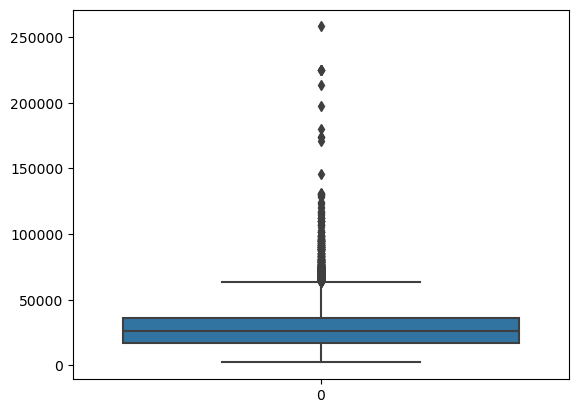

In [21]:
sns.boxplot(df['AMT_ANNUITY'])

In [22]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean,inplace=True)

In [23]:
df['AMT_ANNUITY'].isna().sum()

0

In [30]:
Category=["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
          "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","AGE_GROUP","INCOME_CLASS"
          ,"YEARS_EMP_GROUP","AMT_CREDIT_GROUP","AMT_ANNUITY_GROUP","CNT_CHILDREN"]

In [31]:
Numerical=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
           "AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","YEAR_EMPLOYED","AGE"]

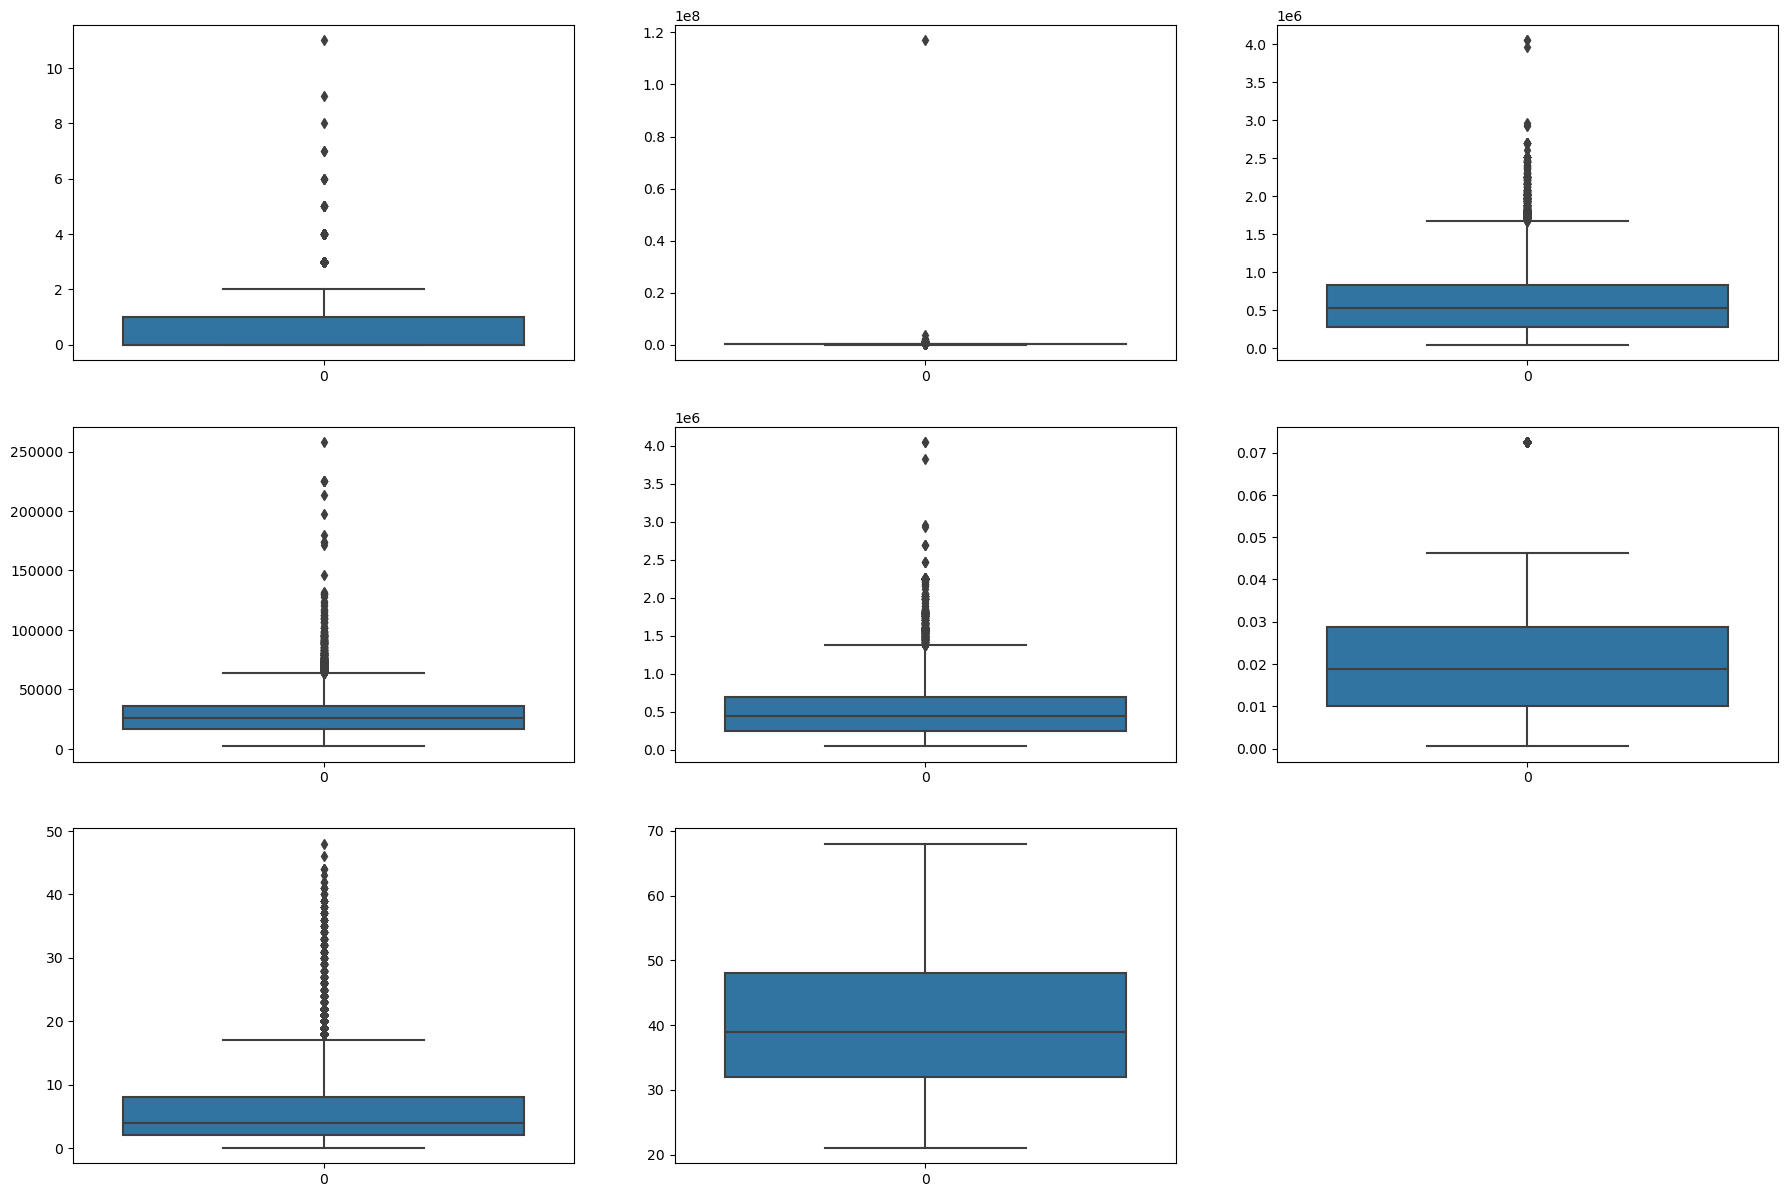

In [32]:
plt.figure(figsize=(22,20))

for i in enumerate(Numerical):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(df[i[1]])

plt.show()


In [675]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean,inplace=True)

## Imbalance ratio

In [676]:
df['AMT_GOODS_PRICE'].isnull().sum()

0

In [677]:
df['TARGET'].value_counts()

TARGET
0    31216
1     2994
Name: count, dtype: int64

In [515]:
# Checking Data Imbalance/Ratio on Target Variable
df['TARGET'].value_counts(normalize=True)

TARGET
0    0.912482
1    0.087518
Name: proportion, dtype: float64

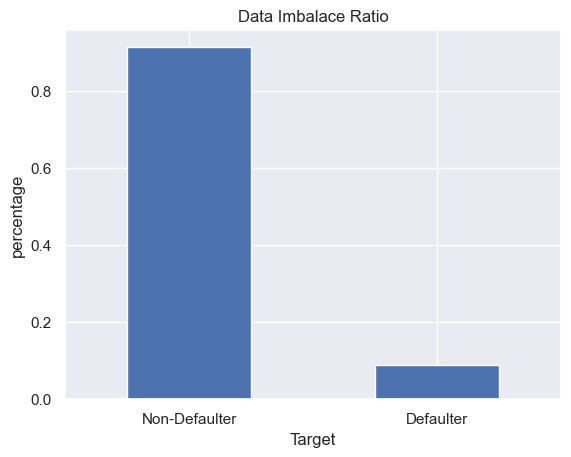

In [516]:
df['TARGET'].value_counts(normalize=True).plot.bar()
plt.xticks((0,1),["Non-Defaulter","Defaulter"],rotation=360)
plt.ylabel("percentage")
plt.xlabel("Target")
plt.title("Data Imbalace Ratio")
plt.show()


## UNIVARIATE ANALYSIS


1.Gender Type

In [678]:
gender=df['CODE_GENDER'].value_counts()

In [518]:
df['CODE_GENDER'].value_counts(normalize=True)*100

CODE_GENDER
F    61.02017
M    38.97983
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

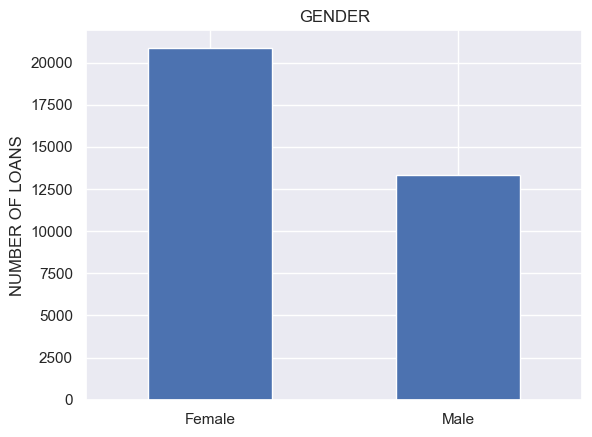

In [519]:
gender.plot.bar()
plt.xticks((0,1),['Female','Male'],rotation=360)
plt.title("GENDER")
plt.xlabel('')
plt.ylabel('NUMBER OF LOANS')

	
2.Income Type

In [520]:
income_type = df['NAME_INCOME_TYPE'].value_counts()

In [521]:
df['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 63.791289
Commercial associate    27.831044
State servant            8.360129
Student                  0.011692
Businessman              0.005846
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

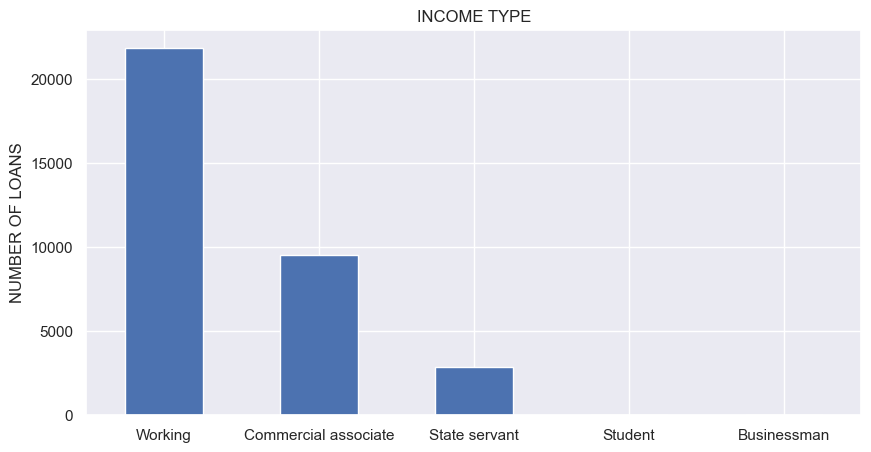

In [522]:
plt.figure(figsize=(10,5))
income_type.plot.bar()
plt.xticks(rotation=360)
plt.title("INCOME TYPE")
plt.xlabel('')
plt.ylabel('NUMBER OF LOANS')

3. Age Type

In [689]:
df["AGE_GROUP"]= pd.cut(df['AGE'],[0,30,40,50,60,99], labels=["<30","30-40","40-50","50-60","60+"])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE,PAYMENT_DIFFICULTY,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,Business Entity Type 3,25,Yes,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,School,45,No,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,Government,52,No,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,Laborers,Business Entity Type 3,52,No,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,Core staff,Religion,54,No,50-60


In [524]:
age = df['AGE_GROUP'].value_counts()

In [525]:
df['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
30-40    33.031277
40-50    28.833674
<30      20.549547
50-60    15.928091
60+       1.657410
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

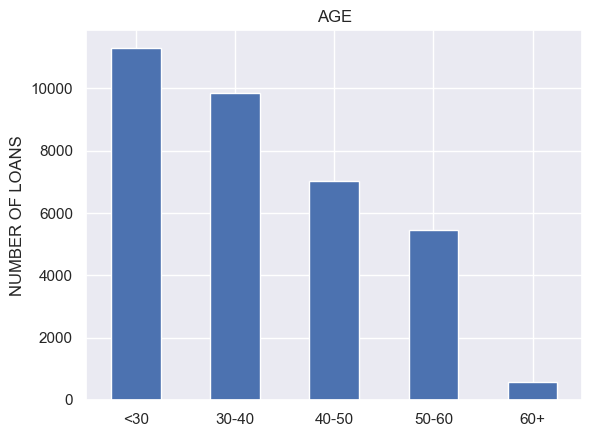

In [526]:
age.plot.bar()
plt.xticks((0,1,2,3,4),['<30','30-40','40-50','50-60','60+'],rotation=360)
plt.title("AGE")
plt.xlabel('')
plt.ylabel('NUMBER OF LOANS')

4. Loan Amount

In [697]:
df["AMT_CREDIT"]= df['AMT_CREDIT']/100000

In [699]:
df['AMT_CREDIT'].value_counts()

AMT_CREDIT
4.500000     1179
1.800000      949
6.750000      948
2.700000      909
2.250000      868
             ... 
5.215680        1
10.247805       1
2.747790        1
4.328415        1
4.678740        1
Name: count, Length: 3032, dtype: int64

In [700]:
df["AMT_CREDIT_GROUP"]= pd.cut(df['AMT_CREDIT'],bins=[0,1,2,3,4,5,6,7,8,9,10,100],labels=["0-100k","100-200K","200-300K","300-400k","400-500k","500-600k","600-700k","700-800k",
                                       "800-900k","900-1M","1M+"])

In [701]:
df["AMT_CREDIT_GROUP"].value_counts()


AMT_CREDIT_GROUP
1M+         5888
200-300K    5760
500-600k    3807
400-500k    3643
100-200K    3267
300-400k    2961
600-700k    2649
800-900k    2515
700-800k    2079
900-1M      1066
0-100k       575
Name: count, dtype: int64

In [702]:
df["AMT_CREDIT_GROUP"].value_counts(normalize=True)*100

AMT_CREDIT_GROUP
1M+         17.211342
200-300K    16.837182
500-600k    11.128325
400-500k    10.648933
100-200K     9.549839
300-400k     8.655364
600-700k     7.743350
800-900k     7.351652
700-800k     6.077170
900-1M       3.116048
0-100k       1.680795
Name: proportion, dtype: float64

Text(0, 0.5, 'LOAN AMOUNT')

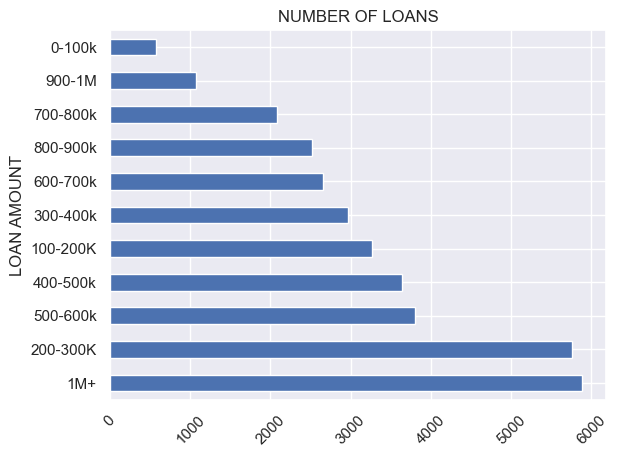

In [531]:
loan_amt.plot.barh()
plt.xticks(rotation=45)
plt.title('NUMBER OF LOANS')
plt.ylabel('LOAN AMOUNT')


5. Loan Type

In [532]:
loan_type = df['NAME_CONTRACT_TYPE'].value_counts()

In [ ]:
df['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE
Cash loans         89.853844
Revolving loans    10.146156
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

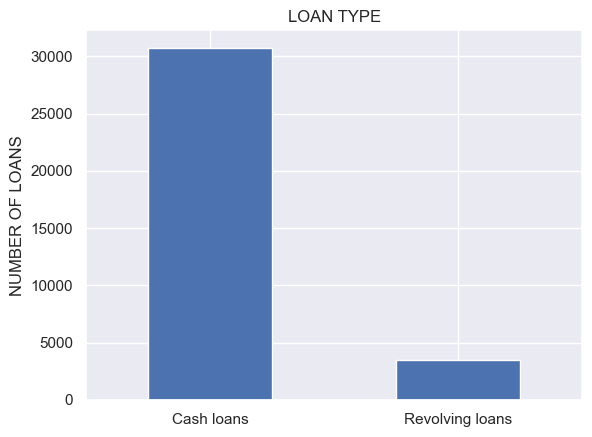

In [533]:
loan_type.plot.bar()
plt.xticks(rotation=360)
plt.title("LOAN TYPE")
plt.xlabel('')
plt.ylabel('NUMBER OF LOANS')

6. FAMILY STATUS

In [535]:
family_status = df['NAME_FAMILY_STATUS'].value_counts()

In [536]:
df['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

NAME_FAMILY_STATUS
Married                 65.551008
Single / not married    15.162233
Civil marriage          10.473546
Separated                6.235019
Widow                    2.578194
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

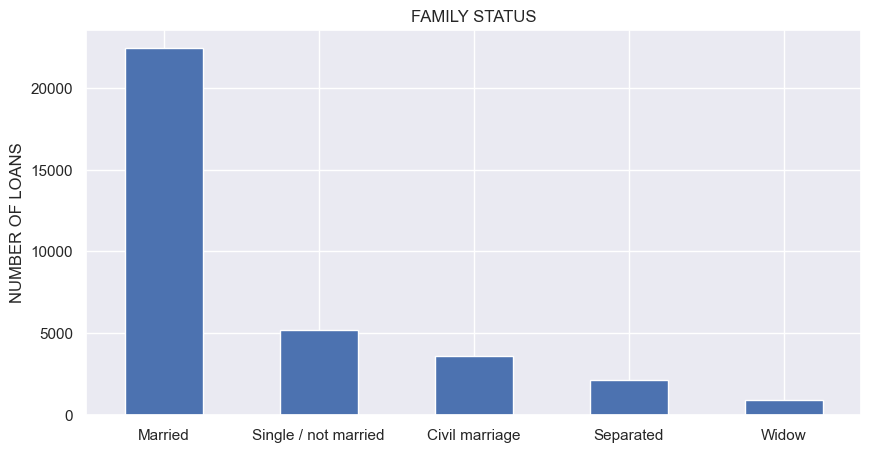

In [538]:
plt.figure(figsize=(10,5))
family_status.plot.bar()
plt.title("FAMILY STATUS")
plt.xticks(rotation=360)
plt.xlabel("")
plt.ylabel('NUMBER OF LOANS')

7. CAR OWNERS

In [539]:
own_car = df['FLAG_OWN_CAR'].value_counts()

In [540]:
df['FLAG_OWN_CAR'].value_counts(normalize=True)*100

FLAG_OWN_CAR
N    61.967261
Y    38.032739
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

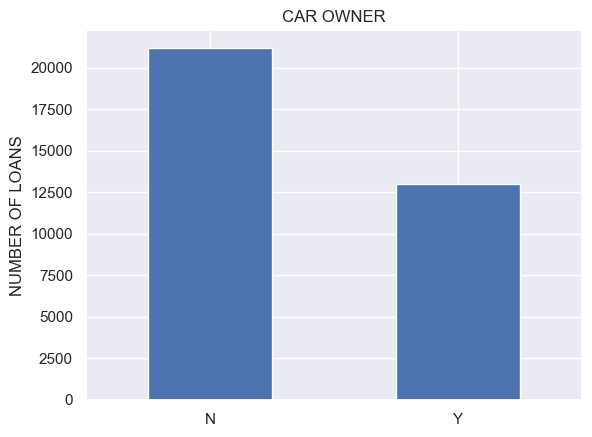

In [541]:
own_car.plot.bar()
plt.title('CAR OWNER')
plt.xticks(rotation=360)
plt.xlabel("")
plt.ylabel('NUMBER OF LOANS')

8. REALTY OWNERS

In [542]:
realty_own = df['FLAG_OWN_REALTY'].value_counts()

In [543]:
df['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

FLAG_OWN_REALTY
Y    68.330897
N    31.669103
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

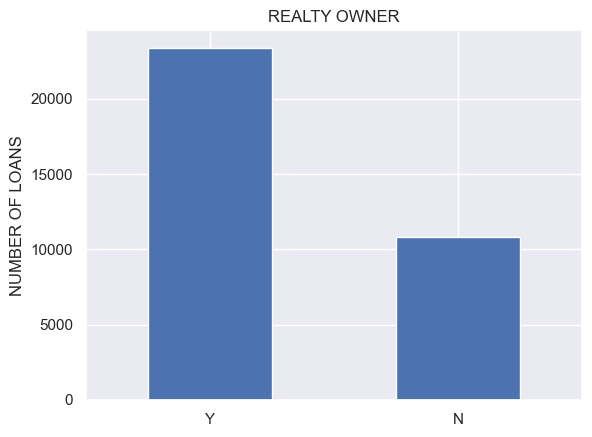

In [544]:
realty_own.plot.bar()
plt.title('REALTY OWNER')
plt.xticks(rotation=360)
plt.xlabel("")
plt.ylabel('NUMBER OF LOANS')

9. EDUCATION TYPE

In [545]:
education_type = df['NAME_EDUCATION_TYPE'].value_counts()

In [546]:
df['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

NAME_EDUCATION_TYPE
Secondary / secondary special    69.812920
Higher education                 25.641625
Incomplete higher                 3.604209
Lower secondary                   0.903245
Academic degree                   0.038001
Name: proportion, dtype: float64

Text(0, 0.5, 'NUMBER OF LOANS')

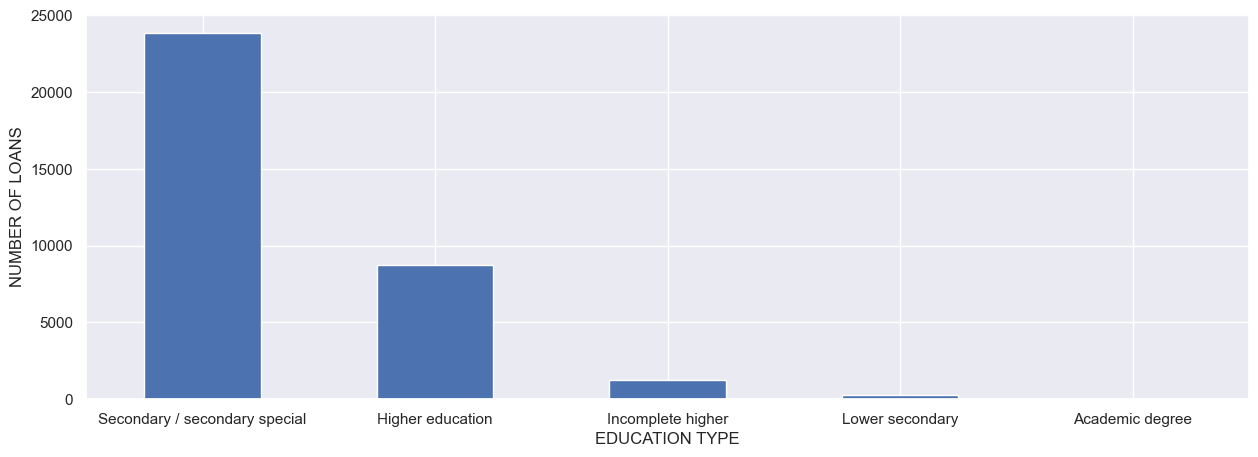

In [553]:
plt.figure(figsize = (15,5))
education_type.plot.bar()
plt.xticks(rotation=360)
plt.title("")
plt.xlabel("EDUCATION TYPE")
plt.ylabel('NUMBER OF LOANS')

10. HOUSING TYPE

In [554]:
housing_type = df['NAME_HOUSING_TYPE'].value_counts()

In [555]:
df['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

NAME_HOUSING_TYPE
House / apartment      87.553347
With parents            5.755627
Municipal apartment     3.583747
Rented apartment        1.794797
Office apartment        0.897398
Co-op apartment         0.415083
Name: proportion, dtype: float64

Text(0.5, 1.0, '')

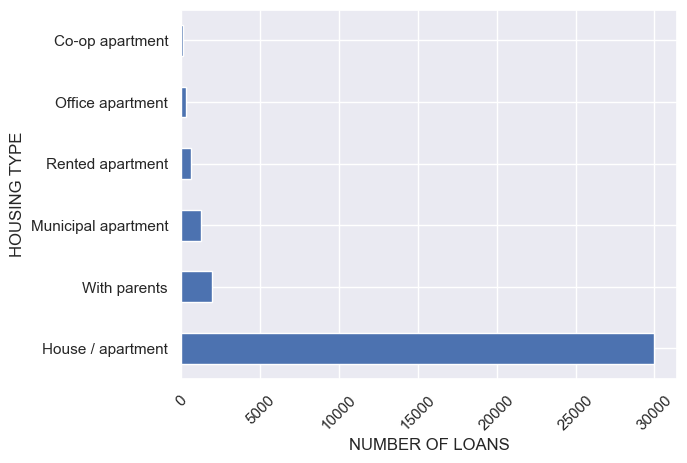

In [556]:
housing_type.plot.barh()
plt.xticks(rotation=45)
plt.ylabel("HOUSING TYPE")
plt.xlabel('NUMBER OF LOANS')
plt.title("")

11.  OCCUPATION TYPE

In [557]:
occupation_type = df['OCCUPATION_TYPE'].value_counts()

In [558]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.085940
Sales staff              15.042385
Core staff               12.870506
Managers                 10.154925
Drivers                   8.857059
High skill tech staff     5.387314
Accountants               4.726688
Medicine staff            4.095294
Security staff            3.311897
Cooking staff             2.812043
Cleaning staff            2.160187
Private service staff     1.297866
Low-skill Laborers        1.043555
Waiters/barmen staff      0.660626
Secretaries               0.616779
Realty agents             0.359544
HR staff                  0.289389
IT staff                  0.228004
Name: proportion, dtype: float64

In [33]:
occupation_type.plot.barh()
plt.xticks(rotation=45)
plt.grid(True)
plt.ylabel("OCCUPATION TYPE")
plt.xlabel('NUMBER OF LOANS')
plt.title("")

NameError: name 'occupation_type' is not defined

12. YEARS EMPLOYED

In [709]:
df["YEAR_EMPLOYED_GROUP"]= pd.cut(df['YEAR_EMPLOYED'],bins=[-1,5,10,20,30,40,50,60,1000],labels=["0-5","5-10","10-20","20-30","30-40","40-50","50-60","60+"])

In [710]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE,PAYMENT_DIFFICULTY,AGE_GROUP,AMT_CREDIT_GROUP,YEAR_EMPLOYED,YEAR_EMPLOYED_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,Business Entity Type 3,25,Yes,<30,400-500k,1,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,School,45,No,40-50,1M+,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,Government,52,No,50-60,100-200K,0,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,Laborers,Business Entity Type 3,52,No,50-60,300-400k,8,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,Core staff,Religion,54,No,50-60,500-600k,8,5-10


In [562]:
year_employed = df['YEAR_EMPLOYED_GROUP'].value_counts()

In [563]:
df['YEAR_EMPLOYED_GROUP'].value_counts(normalize=True)*100

YEAR_EMPLOYED_GROUP
0-5      60.672318
5-10     22.037416
10-20    12.782812
20-30     3.463899
30-40     0.993861
40-50     0.049693
50-60     0.000000
60+       0.000000
Name: proportion, dtype: float64

Text(0.5, 1.0, '')

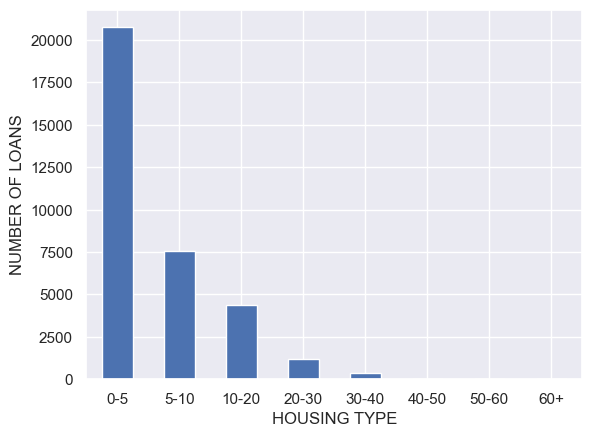

In [564]:
year_employed.plot.bar()
plt.xticks(rotation=360)
plt.xlabel("HOUSING TYPE")
plt.ylabel('NUMBER OF LOANS')
plt.title("")

BIVARIATE ANALYSIS

In [685]:
df['PAYMENT_DIFFICULTY']= np.where(df['TARGET']==1,"Yes","No")

Text(0, 0.5, 'Number of loans')

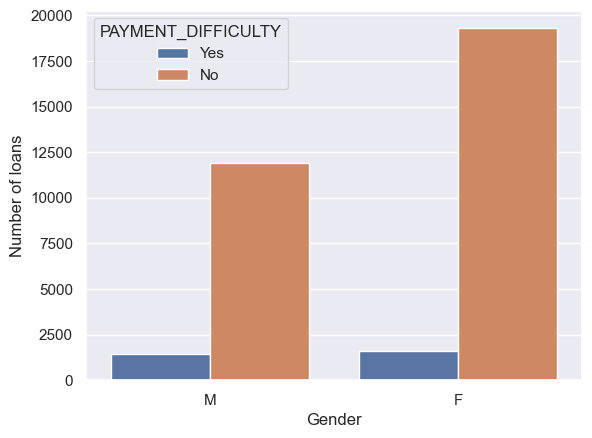

In [686]:
#plt.figure(figsize=(10,5))
sns.countplot(x= df['CODE_GENDER'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xlabel("Gender")
plt.ylabel("Number of loans")
#plt.xticks((F,M),['Female','Male'],rotation=360)

Text(0, 0.5, 'Number of loans')

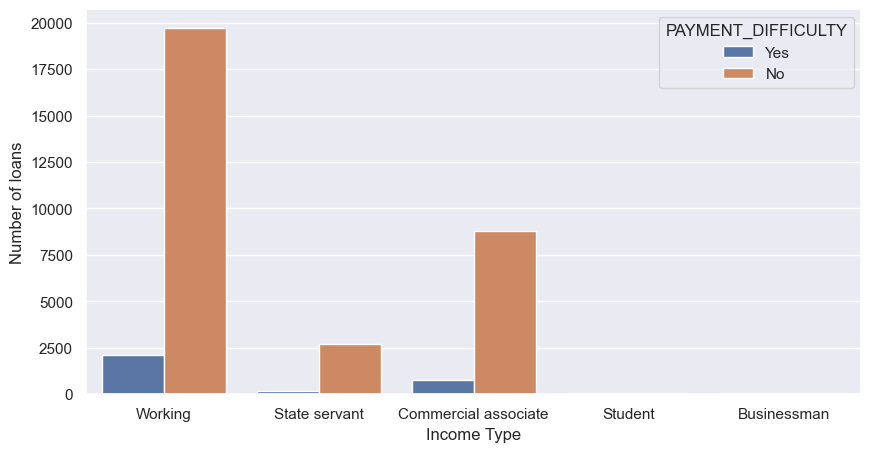

In [687]:
plt.figure(figsize=(10,5))
sns.countplot(x= df['NAME_INCOME_TYPE'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xlabel("Income Type")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

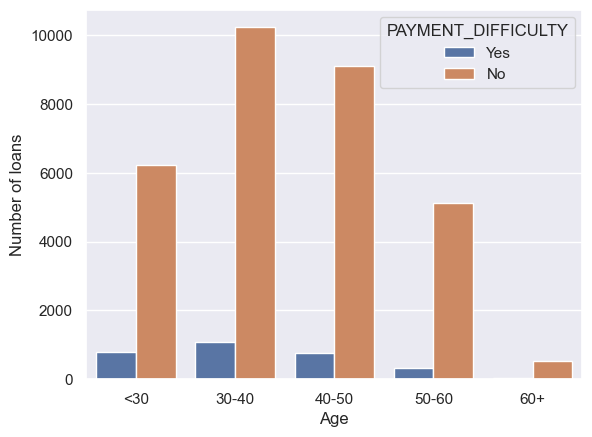

In [690]:
sns.countplot(x= df['AGE_GROUP'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xlabel('Age')
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

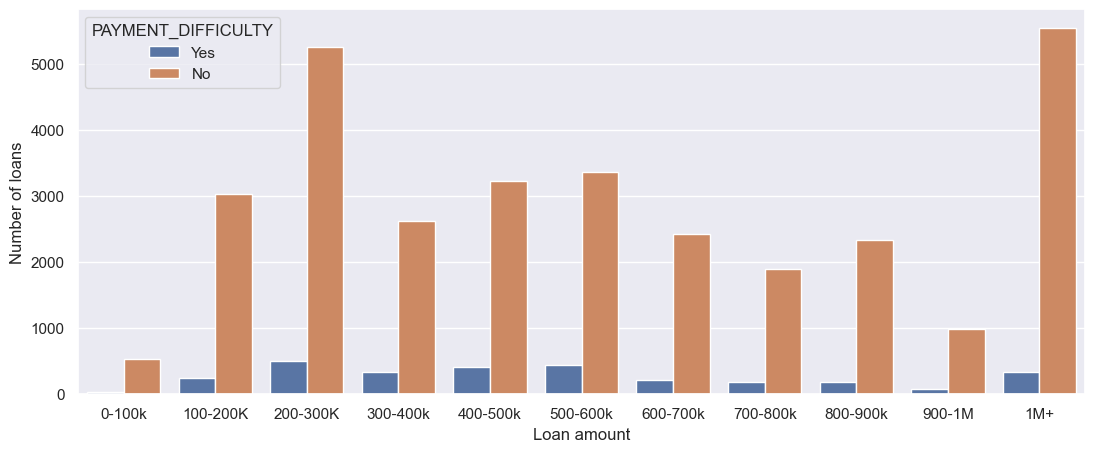

In [703]:
plt.figure(figsize=(13,5))
sns.countplot(x= df['AMT_CREDIT_GROUP'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xlabel("Loan amount")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

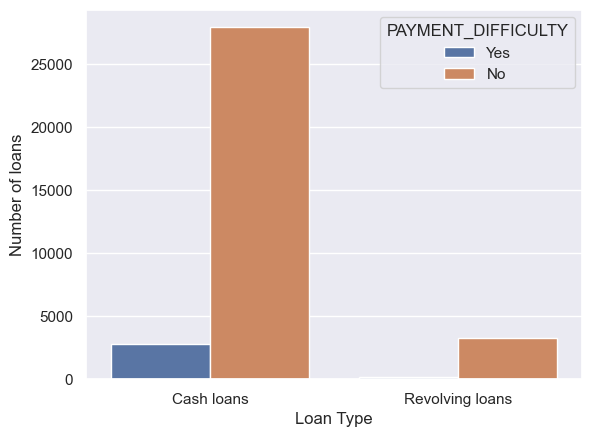

In [704]:
sns.countplot(x= df['NAME_CONTRACT_TYPE'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xlabel("Loan Type")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of Loans')

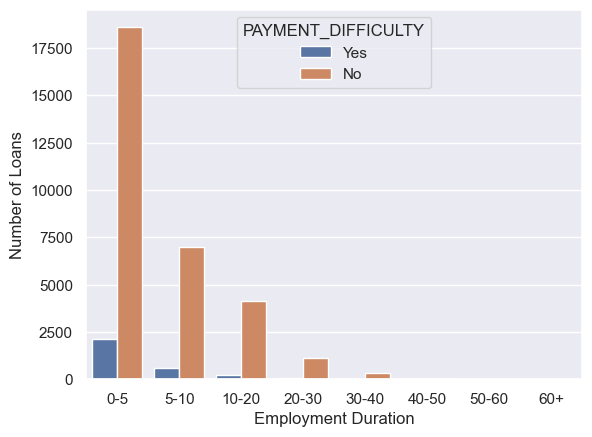

In [711]:
#plt.figure(figsize=(10,10))
sns.countplot(x= df['YEAR_EMPLOYED_GROUP'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xlabel("Employment Duration")
plt.ylabel("Number of Loans")

Text(0.5, 0, 'Number of loans')

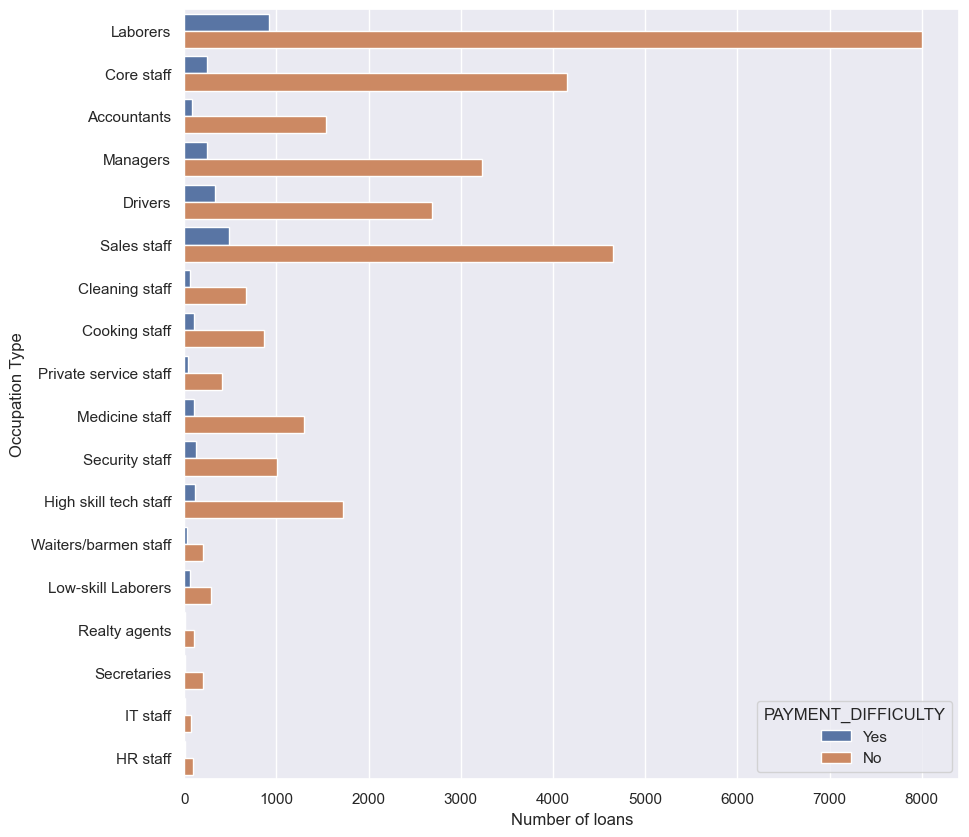

In [712]:
plt.figure(figsize=(10,10))
sns.countplot(y= df['OCCUPATION_TYPE'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=360)
plt.ylabel("Occupation Type")
plt.xlabel("Number of loans")

Text(0, 0.5, 'Number of loans')

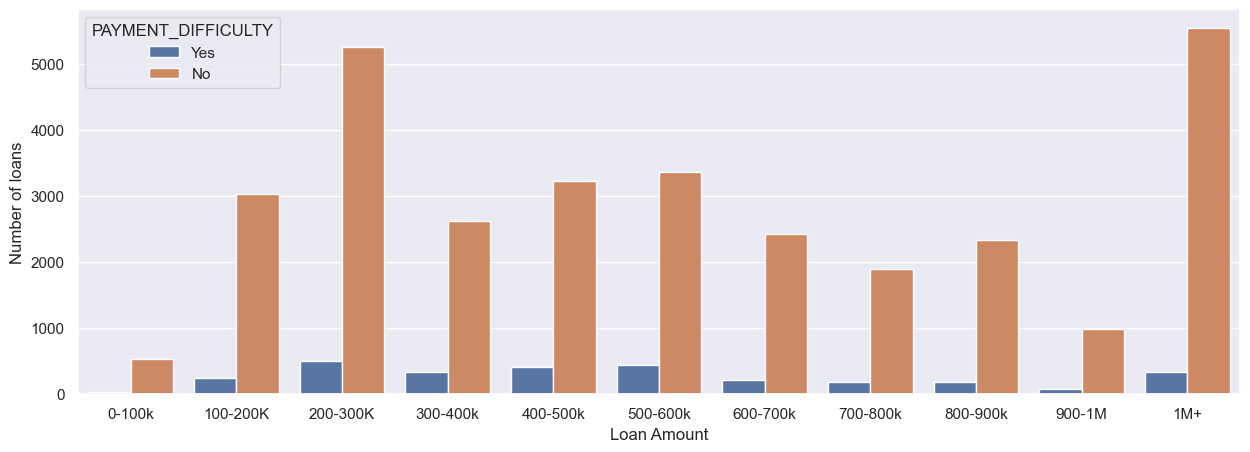

In [713]:
plt.figure(figsize=(15,5))
sns.countplot(x= df['AMT_CREDIT_GROUP'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=360)
plt.xlabel("Loan Amount")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

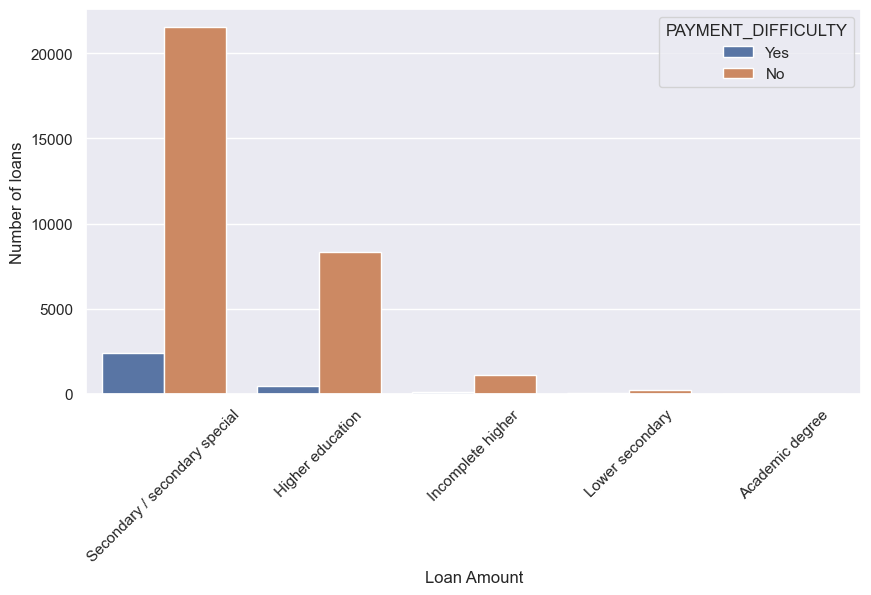

In [714]:
plt.figure(figsize=(10,5))
sns.countplot(x= df['NAME_EDUCATION_TYPE'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=45)
plt.xlabel("Loan Amount")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

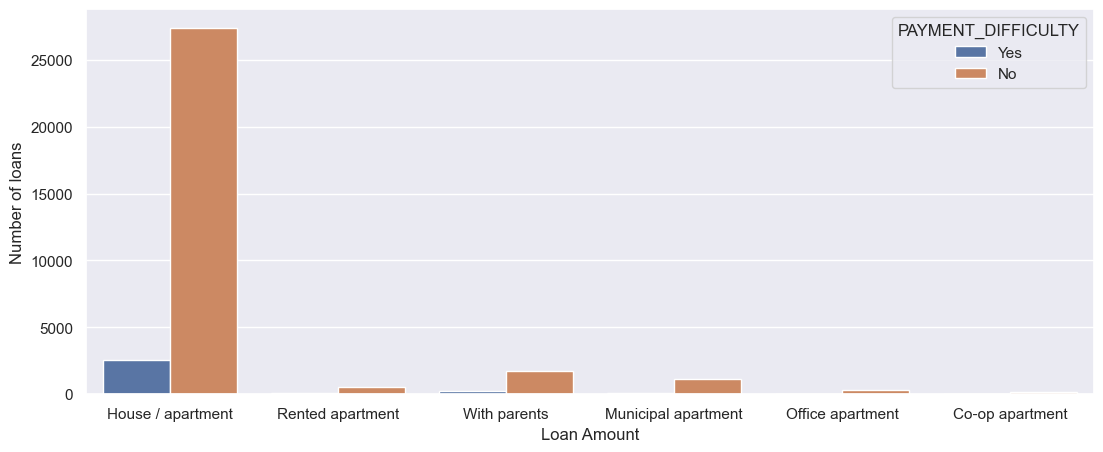

In [715]:
plt.figure(figsize=(13,5))
sns.countplot(x= df['NAME_HOUSING_TYPE'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=360)
plt.xlabel("Loan Amount")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

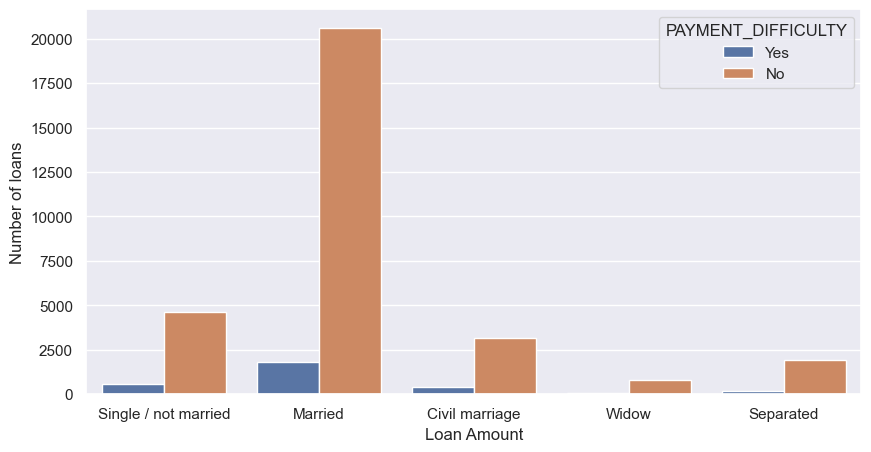

In [716]:
plt.figure(figsize=(10,5))
sns.countplot(x= df['NAME_FAMILY_STATUS'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=360)
plt.xlabel("Loan Amount")
plt.ylabel("Number of loans")

Text(0, 0.5, 'Number of loans')

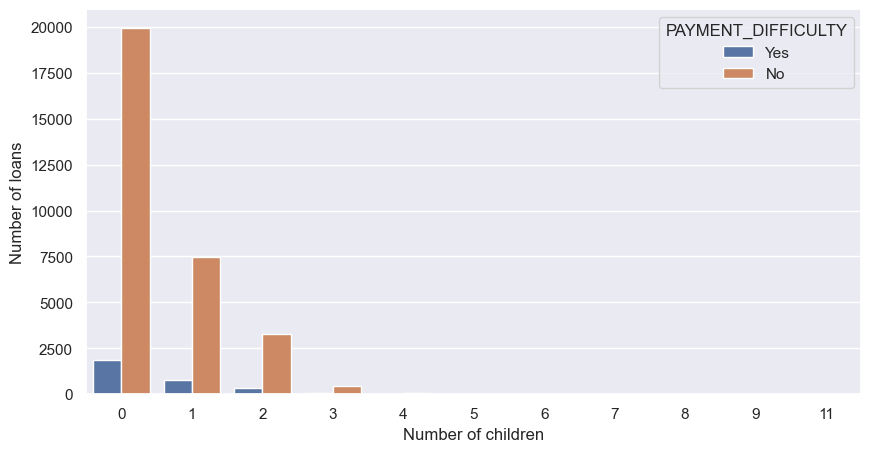

In [717]:
plt.figure(figsize=(10,5))
sns.countplot(x= df['CNT_CHILDREN'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=360)
plt.xlabel("Number of children")
plt.ylabel("Number of loans")

In [621]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE,YEAR_EMPLOYED,YEAR_EMPLOYED_GROUP,AGE_GROUP,AMT_CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,Business Entity Type 3,25,1,0-5,<30,400-500k
1,100003,0,Cash loans,F,N,N,0,270000.0,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,School,45,3,0-5,40-50,1M+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,Government,52,0,0-5,50-60,100-200K
3,100006,0,Cash loans,F,N,Y,0,135000.0,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,Laborers,Business Entity Type 3,52,8,5-10,50-60,300-400k
4,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,Core staff,Religion,54,8,5-10,50-60,500-600k


Text(0, 0.5, 'Number of loans')

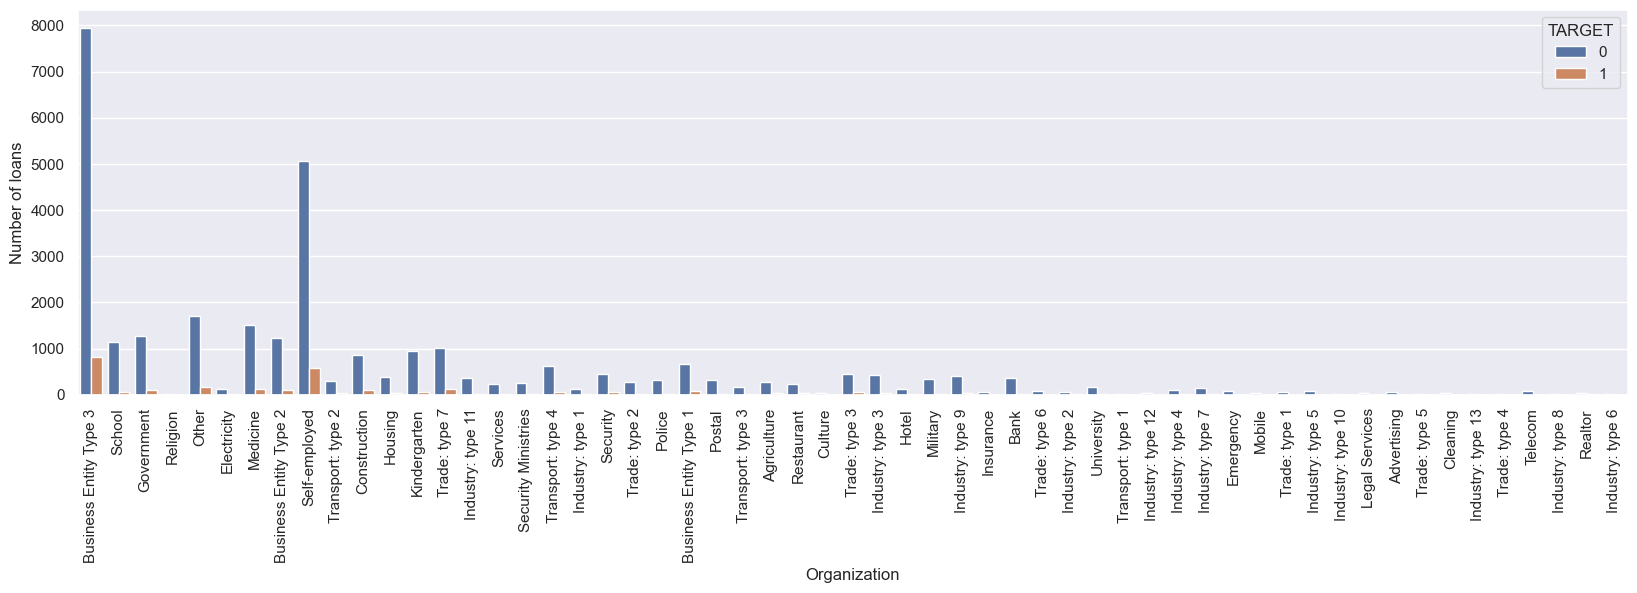

In [635]:
plt.figure(figsize=(20,5))
sns.countplot(x= df['ORGANIZATION_TYPE'],hue='PAYMENT_DIFFICULTY',data=df)
plt.xticks(rotation=90)
plt.xlabel("Organization")
plt.ylabel("Number of loans")

In [638]:
Defaulters = df[df["TARGET"] == 1]
NonDefaulters = df[df["TARGET"]== 0]

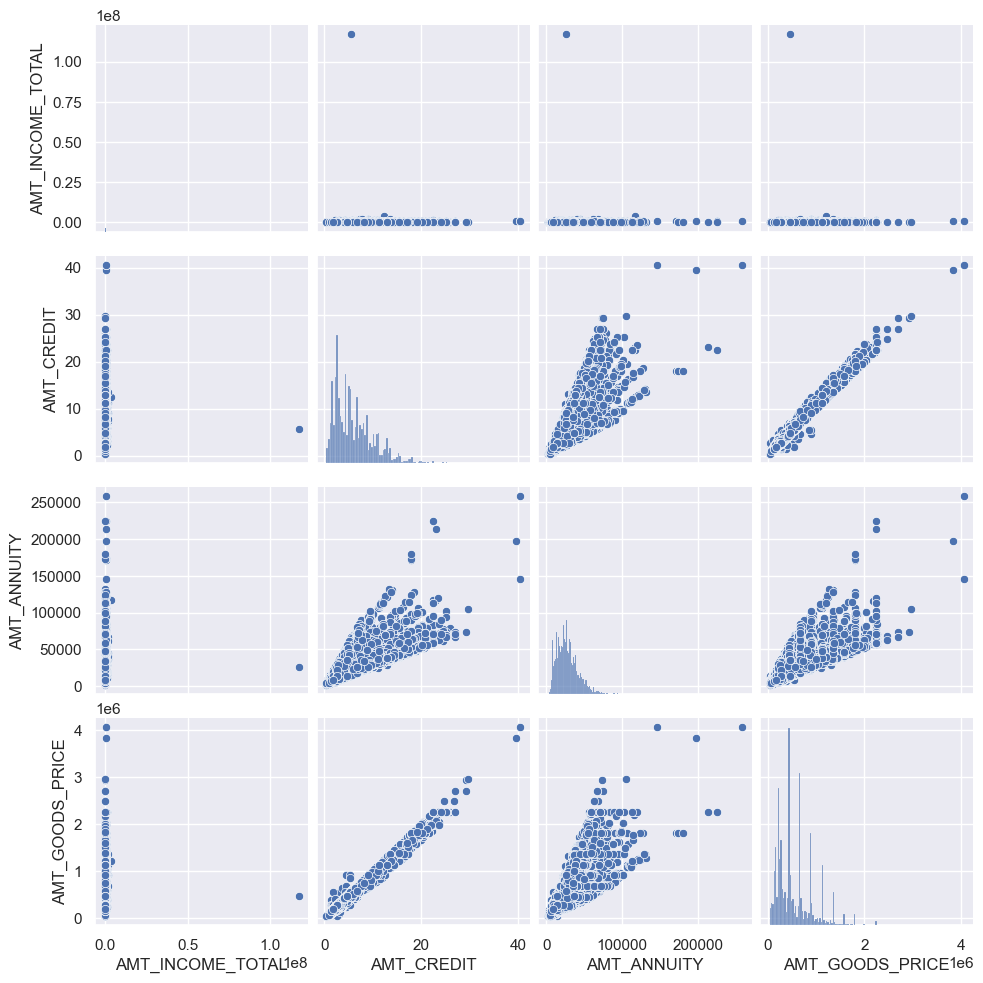

In [639]:
sns.pairplot(data=df,vars=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])

CORRELATION ANALYSIS

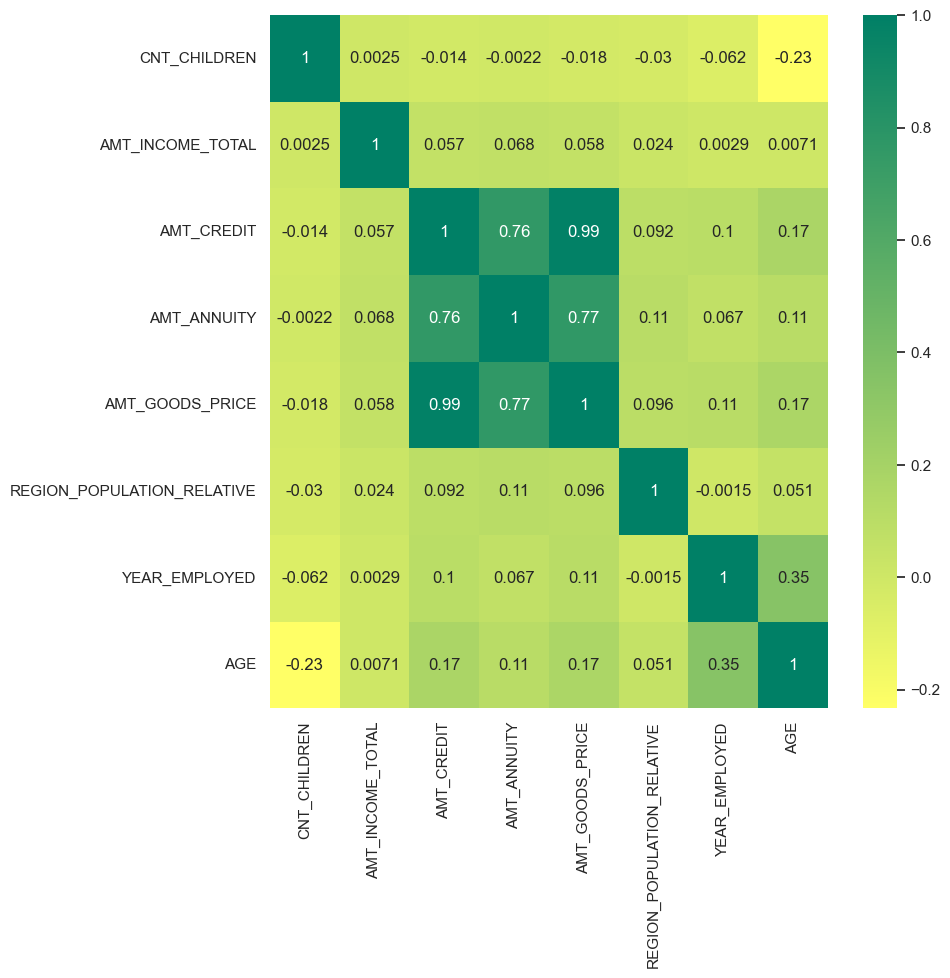

In [644]:
plt.figure(figsize=[9,9])
sns.heatmap(df[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
           "AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","YEAR_EMPLOYED","AGE"]].corr(), annot=True, cmap="summer_r")
plt.show()